## Adagrad, RMSProp, and Adam

For this practical work, the student will have to develop a Python program that is able to implement the accelerated gradient descent methods with adaptive learning rate <b>(Adagrad, RMSProp, and Adam)</b> in order to achieve the linear regression of a set of datapoints.

#### Import numpy, matplotlib.pyplot and make it inline

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

To have a dataset or set of data points, the student must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that: 
<b>yi = a*xi + b (and a = -1, b = 2)</b>


In [2]:
def plotting(X,Y,h_list , theta_0_list , theta_1_list , cost_list):
    plt.plot(cost_list)
    plt.xlabel("Itteration")
    plt.ylabel("Cost")
    plt.show()
    """______________________________________________"""
    plt.plot(theta_0_list,cost_list)
    plt.xlabel("theta_0")
    plt.ylabel("Cost")
    plt.show()
    """______________________________________________"""
    plt.plot(theta_1_list,cost_list)
    plt.xlabel("theta_1")
    plt.ylabel("Cost")
    plt.show()
    """______________________________________________"""
    plt.plot(X,Y , "*")
    for i in h_list:
      plt.plot(X,i  ,alpha = 0.4)
    plt.title("X vs. Y (All Fits)")
    plt.show()
    """______________________________________________"""
    plt.plot(X,Y , "*")
    plt.plot(X,h_list[-1], color = "black")
    plt.title("X vs. Y (Best Fit)")
    plt.show()   

In [3]:
a = -1
b = 2
X = np.linspace(0,20)
Y = a * X + b

#### Plot your data points. 

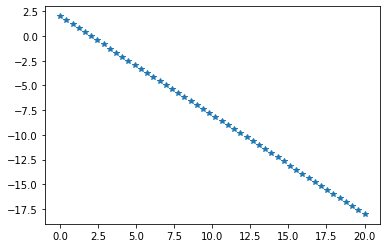

In [4]:
plt.plot(X,Y,"*")

## Adagrad

### For a single variable linear regression ML model, build a function to find the optimum Theta_0 and Theta_1 parameters using Adagrad optimization algorithm.
#### The funtion should have the following input parameters:
##### 1. Input data as a matrix (or vector based on your data).
##### 2. Target label as a vector.
##### 3. Learning rate.
##### 4. Epsilon.
##### 5. Maximum number of iterations (Epochs).
#### The funtion should return the following outputs:
##### 1. All predicted Theta_0 in all iterations.
##### 2. All predicted Theta_1 in all iterations.
##### 3. Corresponding loss for each Theta_0 and Theta_1 predictions.
##### 4.All hypothesis outputs (prdicted labels) for each Theta_0 and Theta_1 predictions.
##### 5.Final Optimum values of Theta_0 and Theta_1.
#### Choose the suitable number of iterations, learning rate, Epsilon, and stop criteria.
#### Calculate r2 score. Shouldn't below 0.9
#### Plot the required curves (loss-epochs, loss-theta0, loss-theta1, all fitted lines per epoch (single graph), best fit line)
#### Try different values of the huperparameters and see the differnce in your results.

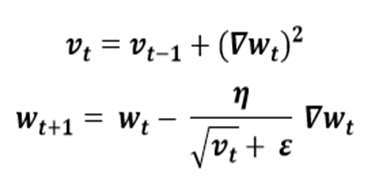

In [106]:
def Adagrad(X,Y, alpha , epsilon , itterations ):
  theta_0 = 0
  theta_1 = 0
  cost_list = []
  theta_0_list = []
  theta_1_list = []
  h_list = []
  v0 = 0 
  v1 = 0

  for i in range (itterations):
    m= len(X)

    h_before = theta_0 + theta_1*X

    cost_before = (1/(2*m)) * np.sum( (h_before - Y )**2 )
    h = h_before

    


    diff_theta_0 = (1/m) * np.sum( h - Y)
    diff_theta_1 = (1/m) * np.sum( (h - Y)*X)

    v0 = v0 + (diff_theta_0)**2
    v1 = v1 + (diff_theta_1)**2

    theta_0 = theta_0  - ( (alpha * diff_theta_0 ) / ( np.sqrt(v0) + epsilon ) )
    theta_1 = theta_1  - ( (alpha * diff_theta_1 ) / ( np.sqrt(v0) + epsilon ) )
    theta_0_list.append(theta_0)
    theta_1_list.append(theta_1)
    h_list.append(h)
    h = theta_0 + theta_1*X

    cost = (1/(2*m)) * np.sum( (h - Y )**2 )
    cost_list.append(cost)

    if (diff_theta_0**2 + diff_theta_1**2)**0.5  < 0.01:
      print(f'Stopped after {i+1} itterations')
      break
    
    
    if abs(cost - cost_before) < 0.0001:
        print("cost break")

        break
    
  print(f"Final Gradient = {(diff_theta_0**2 + diff_theta_1**2)**0.5 } after {i+1} itterations")

  
  return h_list , theta_0_list , theta_1_list , cost_list




In [107]:
""" Trial 1 AdaGrad """
h_list , theta_0_list , theta_1_list , cost_list =  Adagrad(X,Y, 0.07 , 0.00000001 , 1000 )
# print(Y)
# print(h_list[-1])

cost break
Final Gradient = 0.13032589769481498 after 847 itterations


In [108]:
from sklearn.metrics import r2_score
print(f"r2_score = {r2_score(Y,  h_list[-1])}")
print(f"smallest cost  = {cost_list[-1]}")

r2_score = 0.9980888472922173
smallest cost  = 0.033052748174180996


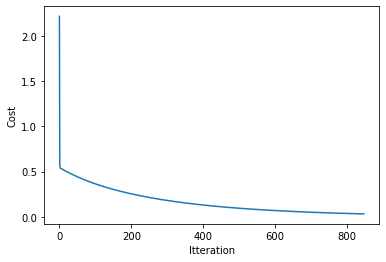

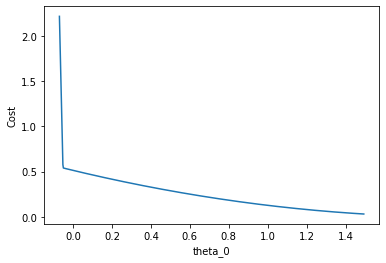

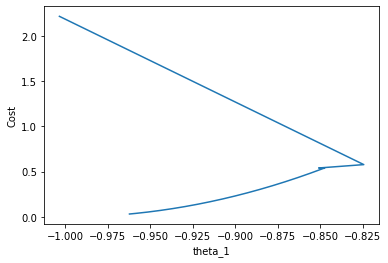

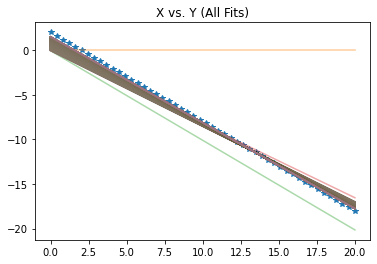

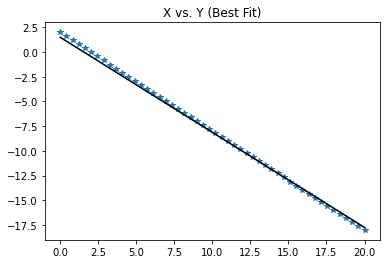

In [109]:
plotting(X,Y,h_list , theta_0_list , theta_1_list , cost_list)

In [110]:
""" Trial 2 AdaGrad """
h_list , theta_0_list , theta_1_list , cost_list =  Adagrad(X,Y, 0.05 , 0.00000001 , 2000 )
# print(Y)
# print(h_list[-1])

cost break
Final Gradient = 0.16084525999256952 after 1059 itterations


In [111]:
from sklearn.metrics import r2_score
print(f"r2_score = {r2_score(Y,  h_list[-1])}")
print(f"smallest cost  = {cost_list[-1]}")

r2_score = 0.9970889445764051
smallest cost  = 0.050398020702178206


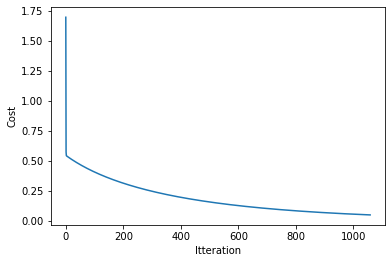

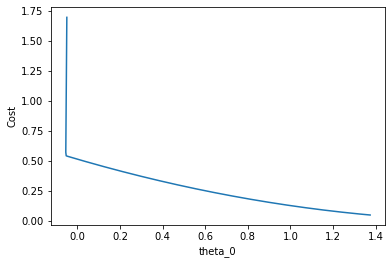

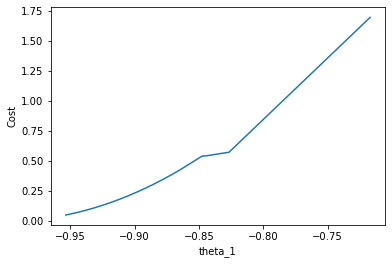

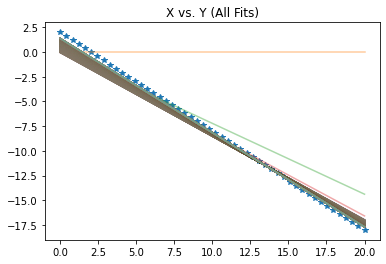

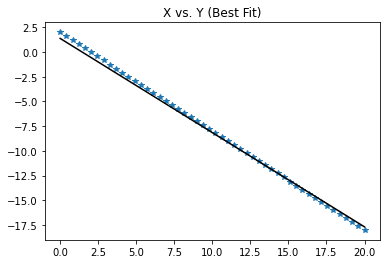

In [112]:
plotting(X,Y,h_list , theta_0_list , theta_1_list , cost_list)

## RMSProp

### Update the previos implementation to be RMSProp.
#### Compare your results with Adagrad results.

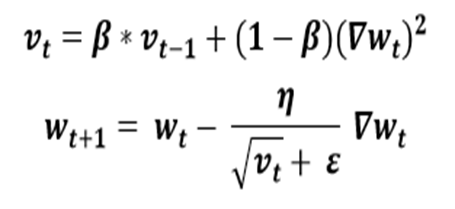

In [46]:
a = -1
b = 2
X = np.linspace(0,20)
Y = a * X + b

In [115]:
def RMS_Prob(X , Y , alpha , beta , epsilon , itterations ):
  theta_0 = 0
  theta_1 = 0
  cost_list = []
  theta_0_list = []
  theta_1_list = []
  h_list = []
  v0 = 0 
  v1 = 0
  for i in range (itterations):
    m= len(X)

    h_before = theta_0 + theta_1*X

    cost_before = (1/(2*m)) * np.sum( (h_before - Y )**2 )
    h = h_before
    

    diff_theta_0 = (1/m) * np.sum( h - Y)
    diff_theta_1 = (1/m) * np.sum( (h - Y)*X)

    v0 = beta*v0 + ( (1 - beta) * ((diff_theta_0)**2))
    v1 = beta*v1 + ( (1 - beta) * ((diff_theta_1)**2))

    theta_0 = theta_0  - ( (alpha * diff_theta_0 ) / ( np.sqrt(v0) + epsilon ) )
    theta_1 = theta_1  - ( (alpha * diff_theta_1 ) / ( np.sqrt(v0) + epsilon ) )
    theta_0_list.append(theta_0)
    theta_1_list.append(theta_1)
    h = theta_0 + theta_1*X

    cost = (1/(2*m)) * np.sum( (h - Y )**2 )
    cost_list.append(cost)
    h_list.append(h)

    if (diff_theta_0**2 + diff_theta_1**2)**0.5  < 0.01:
      print(f'Stopped after {i+1} itterations')
      break
    if abs(cost - cost_before) < 0.0001:
        print("cost break")
        break
  print(f"Final Gradient = {(diff_theta_0**2 + diff_theta_1**2)**0.5 } after {i+1} itterations")
  
  return h_list , theta_0_list , theta_1_list , cost_list



In [116]:
""" Trial 1 RMS_Prob """
h_list , theta_0_list , theta_1_list , cost_list = RMS_Prob(X , Y , 0.001 , 0.5 , 0.00000001 , 1000 )


Final Gradient = 0.28328319138075475 after 1000 itterations


In [117]:
from sklearn.metrics import r2_score
print(f"r2_score = {r2_score(Y,  h_list[-1])}")
print(f"smallest cost  = {cost_list[-1]}")

r2_score = 0.9909866069236096
smallest cost  = 0.1563547778557511


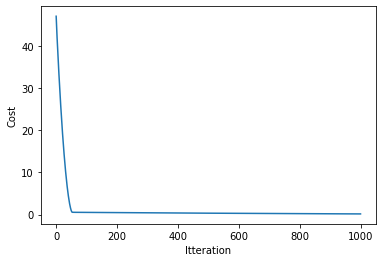

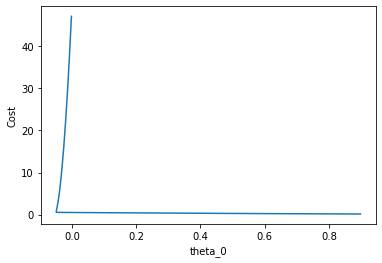

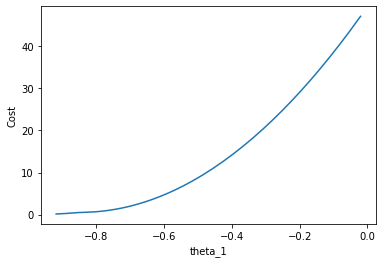

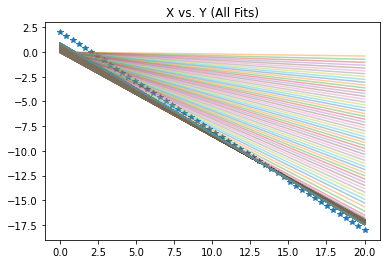

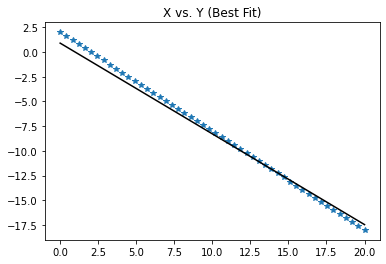

In [118]:
plotting(X,Y,h_list , theta_0_list , theta_1_list , cost_list)

In [119]:
""" Trial 2 RMS_Prob """
h_list , theta_0_list , theta_1_list , cost_list = RMS_Prob(X , Y , 0.01 , 0.75 , 0.00000001 , 1000 )


Final Gradient = 9.100463074920444 after 1000 itterations


In [120]:
from sklearn.metrics import r2_score
print(f"r2_score = {r2_score(Y,  h_list[-1])}")
print(f"smallest cost  = {cost_list[-1]}")

r2_score = 0.9821511887921958
smallest cost  = 0.3096222352374199


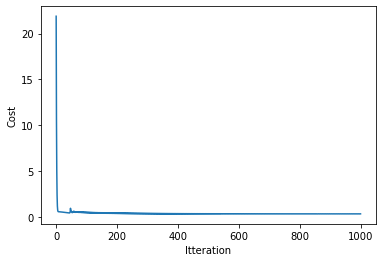

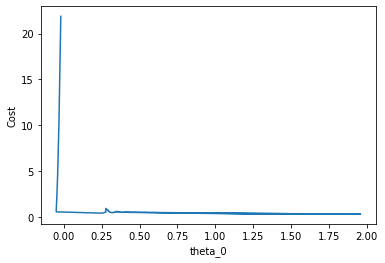

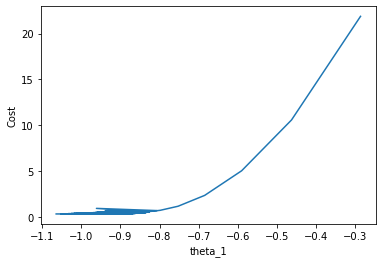

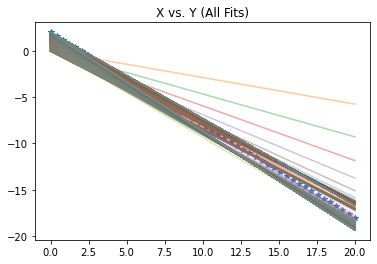

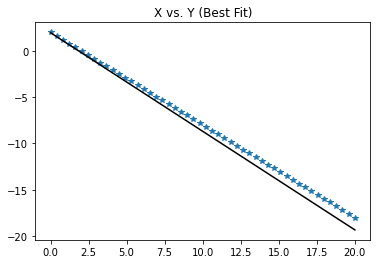

In [121]:
plotting(X,Y,h_list , theta_0_list , theta_1_list , cost_list)

## Adam

### Update the previos implementation to be Adam.
#### Compare your results with Adagrad and RMSProp results.

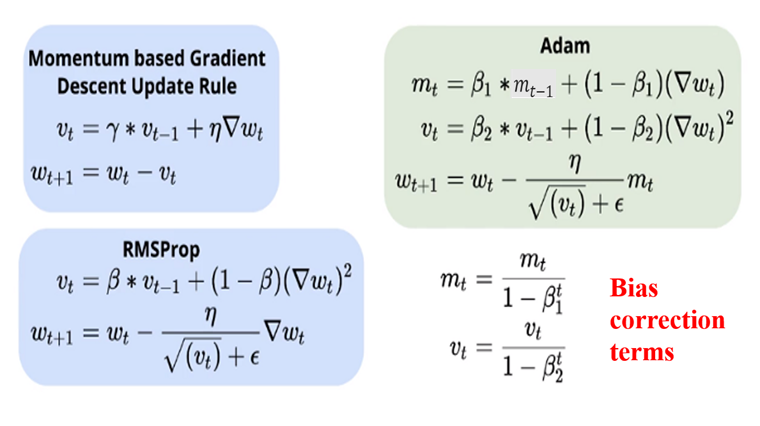

In [133]:
a = -1
b = 2
X = np.linspace(0,20)
Y = a * X + b
def Adam(X , Y , alpha , beta1 , beta2 , epsilon , itterations ):
  theta_0 = 0
  theta_1 = 0
  cost_list = []
  theta_0_list = []
  theta_1_list = []
  h_list = []
  v0 = 0 
  v1 = 0
  
  m0 = 0 #new
  m1 = 0 #new

  for i in range (itterations):
    m= len(X)
    h_before = theta_0 + theta_1*X

    cost_before = (1/(2*m)) * np.sum( (h_before - Y )**2 )
    h = h_before




    diff_theta_0 = (1/m) * np.sum( h - Y)
    diff_theta_1 = (1/m) * np.sum( (h - Y)*X)

    m0 = beta1*m0 + ( (1-beta1) * diff_theta_0 )
    m1 = beta1*m1 + ( (1-beta1) * diff_theta_1 )

#     m0= m0 / (1 - beta1)
#     m1= m1 / (1 - beta1)


    v0 = beta2*v0 + ( (1 - beta2) * ((diff_theta_0)**2))
    v1 = beta2*v1 + ( (1 - beta2) * ((diff_theta_1)**2))

#     v0 = v0 / (1 - beta2)
#     v1 = v1 / (1 - beta2)

    theta_0 = theta_0  - ( (alpha * m0 ) / ( np.sqrt(v0) + epsilon ) )
    theta_1 = theta_1  - ( (alpha * m1 ) / ( np.sqrt(v0) + epsilon ) )
    theta_0_list.append(theta_0)
    theta_1_list.append(theta_1)
    
    h = theta_0 + theta_1*X

    cost = (1/(2*m)) * np.sum( (h - Y )**2 )
    cost_list.append(cost)
    
    h_list.append(h)

    if (diff_theta_0**2 + diff_theta_1**2)**0.5  < 0.01:
      print(f'Stopped after {i+1} itterations')
      break
    if abs(cost - cost_before) < 0.0001:
        print("cost break")
        break
  print(f"Final Gradient = {(diff_theta_0**2 + diff_theta_1**2)**0.5 } after {i+1} itterations")
  
  return h_list , theta_0_list , theta_1_list , cost_list



In [134]:
""" Adam Trial 1"""
h_list , theta_0_list , theta_1_list , cost_list = Adam(X , Y , alpha=0.001 , beta1=0.6 , beta2=0.7 , epsilon=0.0000001 , itterations=1000 )
# print(Y)
# print(h_list[-1])

Final Gradient = 0.2849625340303523 after 1000 itterations


In [135]:
from sklearn.metrics import r2_score
print(f"r2_score = {r2_score(Y,  h_list[-1])}")
print(f"smallest cost  = {cost_list[-1]}")

r2_score = 0.9908793298902392
smallest cost  = 0.15821570598564635


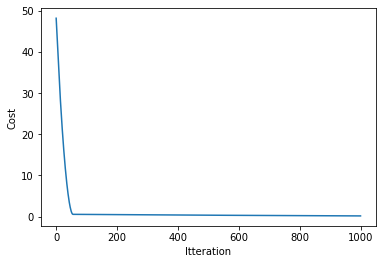

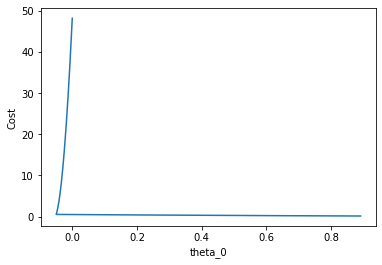

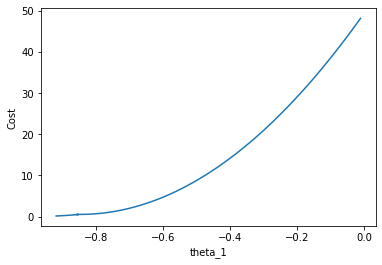

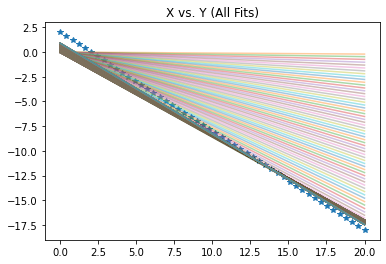

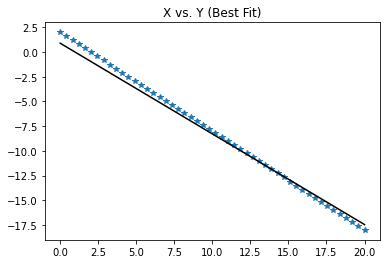

In [136]:
plotting(X,Y,h_list , theta_0_list , theta_1_list , cost_list)

In [137]:
""" Adam Trial 2"""
h_list , theta_0_list , theta_1_list , cost_list = Adam(X , Y , alpha=0.005 , beta1=0.4 , beta2=0.4 , epsilon=0.0000001 , itterations=1000 )
# print(Y)
# print(h_list[-1])

cost break
Final Gradient = 0.1356872321677463 after 359 itterations


In [138]:
from sklearn.metrics import r2_score
print(f"r2_score = {r2_score(Y,  h_list[-1])}")
print(f"smallest cost  = {cost_list[-1]}")

r2_score = 0.99918425135535
smallest cost  = 0.014150741794947632


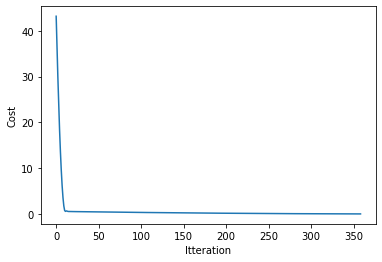

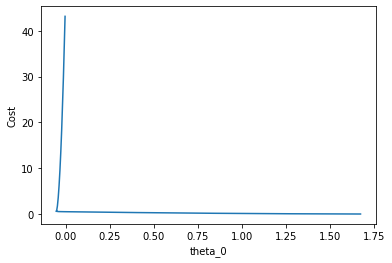

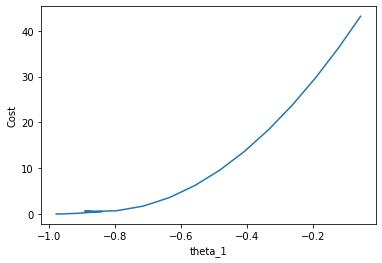

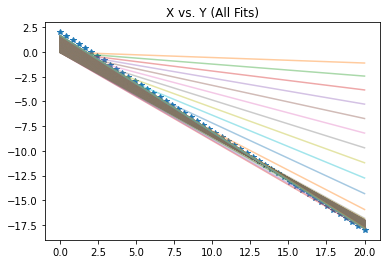

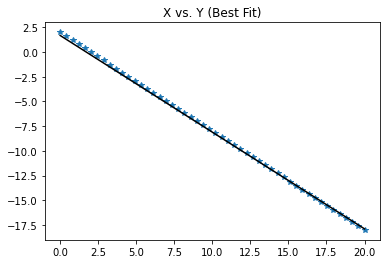

In [139]:
plotting(X,Y,h_list , theta_0_list , theta_1_list , cost_list)

# Comparison

In [140]:
''' Parameters '''
a = -1
b = 2
X = np.linspace(0,20)
Y = a * X + b
alpha = 0.01
epsilon = 0.0000001
itterations = 300
beta = 0.5
beta1 = 0.5

Final Gradient = 0.5059556338153713 after 300 itterations
r2_score = 0.9711956013924151
smallest cost  = 0.499524861357181


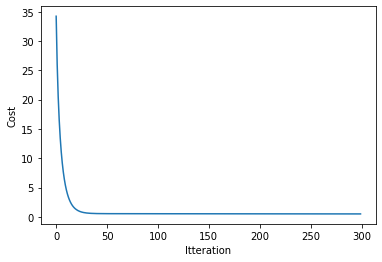

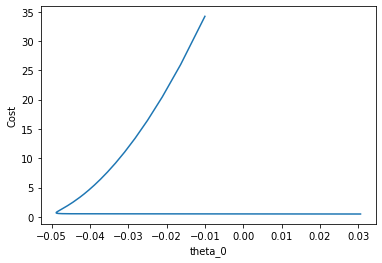

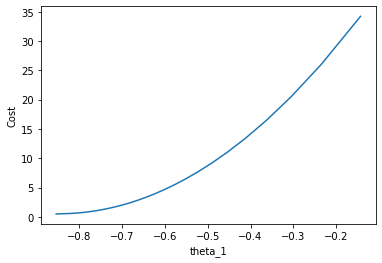

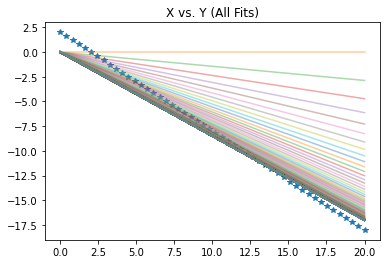

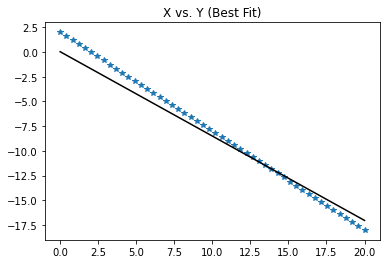

Y = [  2.           1.59183673   1.18367347   0.7755102    0.36734694
  -0.04081633  -0.44897959  -0.85714286  -1.26530612  -1.67346939
  -2.08163265  -2.48979592  -2.89795918  -3.30612245  -3.71428571
  -4.12244898  -4.53061224  -4.93877551  -5.34693878  -5.75510204
  -6.16326531  -6.57142857  -6.97959184  -7.3877551   -7.79591837
  -8.20408163  -8.6122449   -9.02040816  -9.42857143  -9.83673469
 -10.24489796 -10.65306122 -11.06122449 -11.46938776 -11.87755102
 -12.28571429 -12.69387755 -13.10204082 -13.51020408 -13.91836735
 -14.32653061 -14.73469388 -15.14285714 -15.55102041 -15.95918367
 -16.36734694 -16.7755102  -17.18367347 -17.59183673 -18.        ]
h = [  0.03029557  -0.31806595  -0.66642747  -1.01478899  -1.36315051
  -1.71151204  -2.05987356  -2.40823508  -2.7565966   -3.10495812
  -3.45331964  -3.80168116  -4.15004268  -4.4984042   -4.84676573
  -5.19512725  -5.54348877  -5.89185029  -6.24021181  -6.58857333
  -6.93693485  -7.28529637  -7.6336579   -7.98201942  -8.33038094
 

In [141]:
""" Comparison AdaGrad """
h_list , theta_0_list , theta_1_list , cost_list =  Adagrad(X,Y, alpha , epsilon , itterations )

print(f"r2_score = {r2_score(Y,  h_list[-1])}")
print(f"smallest cost  = {cost_list[-1]}")

plotting(X,Y,h_list , theta_0_list , theta_1_list , cost_list)

print(f"Y = {Y}")
print(f"h = {h_list[-1]}")

Final Gradient = 7.65046014186928 after 300 itterations
r2_score = 0.9774057147262138
smallest cost  = 0.3919416833207803


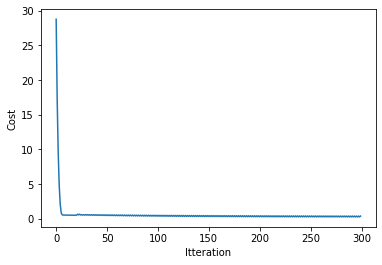

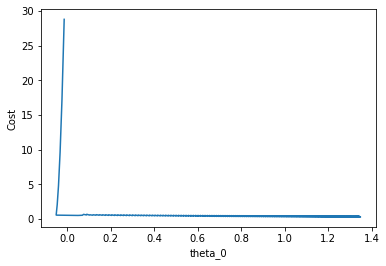

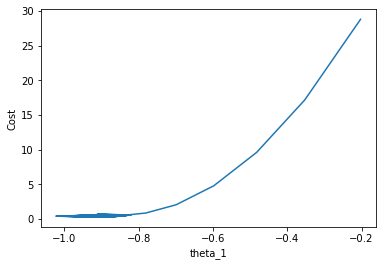

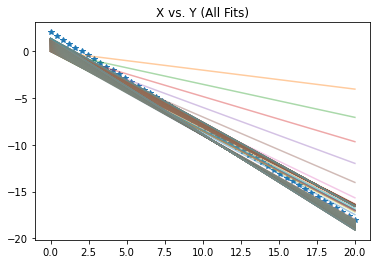

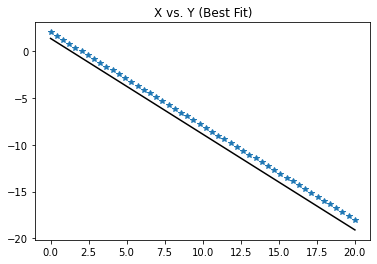

Y = [  2.           1.59183673   1.18367347   0.7755102    0.36734694
  -0.04081633  -0.44897959  -0.85714286  -1.26530612  -1.67346939
  -2.08163265  -2.48979592  -2.89795918  -3.30612245  -3.71428571
  -4.12244898  -4.53061224  -4.93877551  -5.34693878  -5.75510204
  -6.16326531  -6.57142857  -6.97959184  -7.3877551   -7.79591837
  -8.20408163  -8.6122449   -9.02040816  -9.42857143  -9.83673469
 -10.24489796 -10.65306122 -11.06122449 -11.46938776 -11.87755102
 -12.28571429 -12.69387755 -13.10204082 -13.51020408 -13.91836735
 -14.32653061 -14.73469388 -15.14285714 -15.55102041 -15.95918367
 -16.36734694 -16.7755102  -17.18367347 -17.59183673 -18.        ]
h = [  1.34176307   0.92471033   0.50765759   0.09060485  -0.32644789
  -0.74350063  -1.16055337  -1.57760611  -1.99465885  -2.41171158
  -2.82876432  -3.24581706  -3.6628698   -4.07992254  -4.49697528
  -4.91402802  -5.33108076  -5.7481335   -6.16518624  -6.58223898
  -6.99929171  -7.41634445  -7.83339719  -8.25044993  -8.66750267
 

In [142]:
""" Comparison RMS_Prob """
h_list , theta_0_list , theta_1_list , cost_list = RMS_Prob(X , Y , alpha , beta , epsilon , itterations )

print(f"r2_score = {r2_score(Y,  h_list[-1])}")
print(f"smallest cost  = {cost_list[-1]}")

plotting(X,Y,h_list , theta_0_list , theta_1_list , cost_list)

print(f"Y = {Y}")
print(f"h = {h_list[-1]}")

Final Gradient = 3.191873950041637 after 300 itterations
r2_score = 0.998412060633653
smallest cost  = 0.02754588696724477


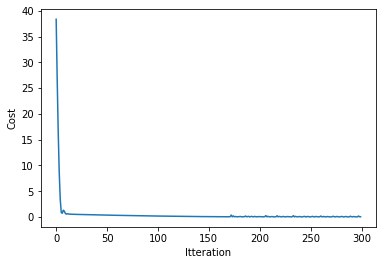

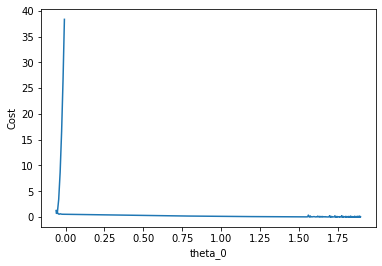

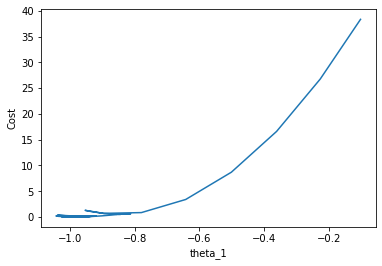

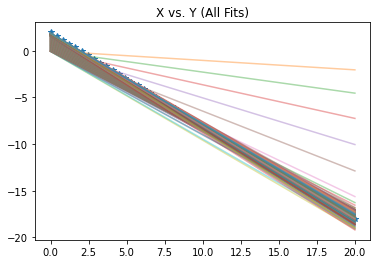

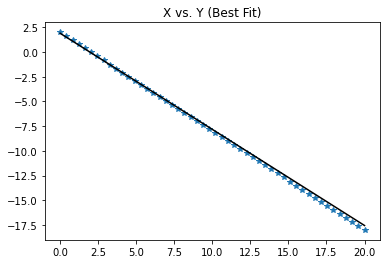

Y = [  2.           1.59183673   1.18367347   0.7755102    0.36734694
  -0.04081633  -0.44897959  -0.85714286  -1.26530612  -1.67346939
  -2.08163265  -2.48979592  -2.89795918  -3.30612245  -3.71428571
  -4.12244898  -4.53061224  -4.93877551  -5.34693878  -5.75510204
  -6.16326531  -6.57142857  -6.97959184  -7.3877551   -7.79591837
  -8.20408163  -8.6122449   -9.02040816  -9.42857143  -9.83673469
 -10.24489796 -10.65306122 -11.06122449 -11.46938776 -11.87755102
 -12.28571429 -12.69387755 -13.10204082 -13.51020408 -13.91836735
 -14.32653061 -14.73469388 -15.14285714 -15.55102041 -15.95918367
 -16.36734694 -16.7755102  -17.18367347 -17.59183673 -18.        ]
h = [  1.89284585   1.49595979   1.09907373   0.70218768   0.30530162
  -0.09158443  -0.48847049  -0.88535655  -1.2822426   -1.67912866
  -2.07601471  -2.47290077  -2.86978683  -3.26667288  -3.66355894
  -4.06044499  -4.45733105  -4.8542171   -5.25110316  -5.64798922
  -6.04487527  -6.44176133  -6.83864738  -7.23553344  -7.6324195
  

In [143]:
""" Comparison Adam """
h_list , theta_0_list , theta_1_list , cost_list = Adam(X , Y , alpha , beta1 , beta , epsilon , itterations )

print(f"r2_score = {r2_score(Y,  h_list[-1])}")
print(f"smallest cost  = {cost_list[-1]}")

plotting(X,Y,h_list , theta_0_list , theta_1_list , cost_list)

print(f"Y = {Y}")
print(f"h = {h_list[-1]}")

Notes:
1. AdaGrad adapts learning rates to the parameters. so it performs smaller updates and has less flucctuations.
2. Adagrad gradually loses learning rate and becomes slower to reach the minimum and needs more itterations.

3. RMS_Prop aims to solve the problem of the decreasing learning rate of AdaGard. 

4. Adam converges better than RMS_Prop and gives more accuracy as it is more stable and slower to change direction. as shown in (theta_1 vs cost)

5. Adam reaches the minimum faster than Adagrad

## Congratulations 
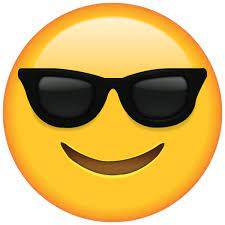